# Overview

This notebook imports Woodstock formatted input data files and schedule harvesting based on even yearly harvesting. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import ws3.forest, ws3.core
import csv
import numpy as np
from util import schedule_harvest_areacontrol, compile_scenario, plot_scenario

In [2]:
base_year = 2020
horizon = 10
period_length = 10
max_age =  1000
tvy_name = 'totvol'
max_harvest = 1

In [3]:
fm = ws3.forest.ForestModel(model_name='redchris',
                            model_path='./data/woodstock_model_files_redchris',
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)
fm.import_landscape_section()
fm.import_areas_section()
fm.import_yields_section()
fm.import_actions_section()
fm.import_transitions_section()
fm.initialize_areas()
fm.add_null_action()
fm.reset_actions()

At this point, we have a simple but fully functional ws3 model instance. 

Implement a priority queue harvest scheduling heuristic.

In [4]:
fm.reset()

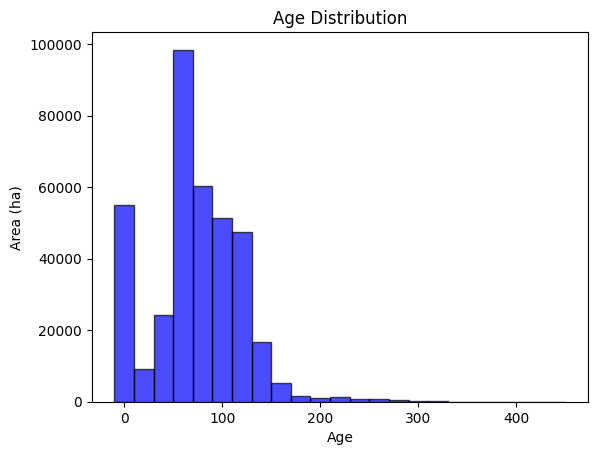

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming fm.age_class_distribution(0) returns a dictionary or two lists (x and y)
data = fm.age_class_distribution(0)

# Extracting x and y values
x_values = list(data.keys())
y_values = list(data.values()) 

# Define custom bin edges
bin_edges = np.arange(0, 480, 20)

# Create a histogram using numpy.histogram()
hist, _ = np.histogram(x_values, bins=bin_edges, weights=y_values)

# Plot the histogram
plt.bar(bin_edges[:-1], hist, width=20, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Area (ha)')
plt.title('Age Distribution')

# Show the plot
plt.show()


In [6]:
verbose = False # flip to True if you want the harvest scheduler to get _really_ chatty while it works
for period in fm.periods:
    schedule_harvest_areacontrol(fm, max_harvest, period=period, verbose=verbose)

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'Harvested area (ha)'}>,
        <Axes: title={'center': 'Harvested volume (m3)'}>,
        <Axes: title={'center': 'Growing Stock (m3)'}>], dtype=object))

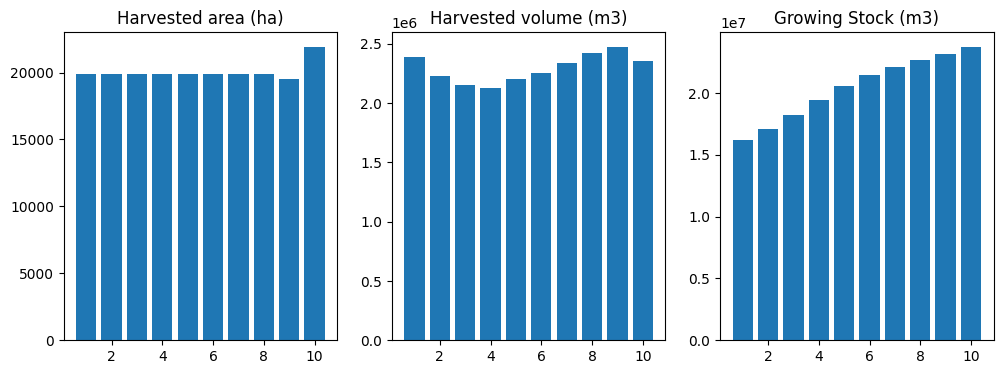

In [7]:
df = compile_scenario(fm)
plot_scenario(df)